In [5]:
#I'm getting started with a dataset of dogs and their owners in Swizterland.

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/sarahberkin/Downloads/archive 1/20170308hundehalter.csv")

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7155 entries, 0 to 7154
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HALTER_ID         7155 non-null   int64  
 1   ALTER             7154 non-null   object 
 2   GESCHLECHT        7155 non-null   object 
 3   STADTKREIS        7154 non-null   float64
 4   STADTQUARTIER     7154 non-null   float64
 5   RASSE1            7155 non-null   object 
 6   RASSE1_MISCHLING  618 non-null    object 
 7   RASSE2            543 non-null    object 
 8   RASSE2_MISCHLING  0 non-null      float64
 9   RASSENTYP         7155 non-null   object 
 10  GEBURTSJAHR_HUND  7155 non-null   int64  
 11  GESCHLECHT_HUND   7155 non-null   object 
 12  HUNDEFARBE        7155 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 726.8+ KB
None


,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Mischling gross,NaN,NaN,NaN,I,2013,w,schwarz
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz


#I see that variables I could potentially find something interesting about include Age & Gender of the owner, district where the owner lives, breed & age of the dog, and more.

In [9]:
def normalize_column_names(df: pd.DataFrame) -> pd.DataFrame:
    df.columns = (df.columns
                 .str.lower()
                 .str.replace(" ", "_"))
    return df

df = normalize_column_names(df)

In [11]:
df.isnull().sum()

halter_id              0
alter                  1
geschlecht             0
stadtkreis             1
stadtquartier          1
rasse1                 0
rasse1_mischling    6537
rasse2              6612
rasse2_mischling    7155
rassentyp              0
geburtsjahr_hund       0
geschlecht_hund        0
hundefarbe             0
dtype: int64

In [13]:
df = df.drop(columns=["rasse1_mischling", "rasse2", "rasse2_mischling"])
print(df.columns)

Index(['halter_id', 'alter', 'geschlecht', 'stadtkreis', 'stadtquartier',
       'rasse1', 'rassentyp', 'geburtsjahr_hund', 'geschlecht_hund',
       'hundefarbe'],
      dtype='object')


In [15]:
df = df.dropna()
df.isnull().sum()

halter_id           0
alter               0
geschlecht          0
stadtkreis          0
stadtquartier       0
rasse1              0
rassentyp           0
geburtsjahr_hund    0
geschlecht_hund     0
hundefarbe          0
dtype: int64

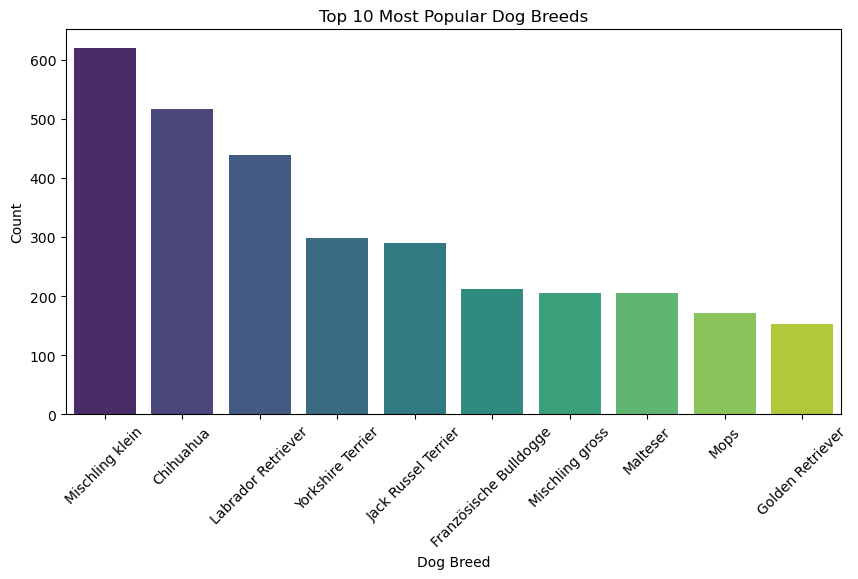

In [23]:
#I want to take a look at which dog breeds are the most common.

import seaborn as sns  

top_breeds = df["rasse1"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    x=top_breeds.index,
    y=top_breeds.values,
    hue=top_breeds.index,
    legend=False,
    palette="viridis"
)
plt.xticks(rotation=45)
plt.xlabel("Dog Breed")
plt.ylabel("Count")
plt.title("Top 10 Most Popular Dog Breeds")
plt.show()

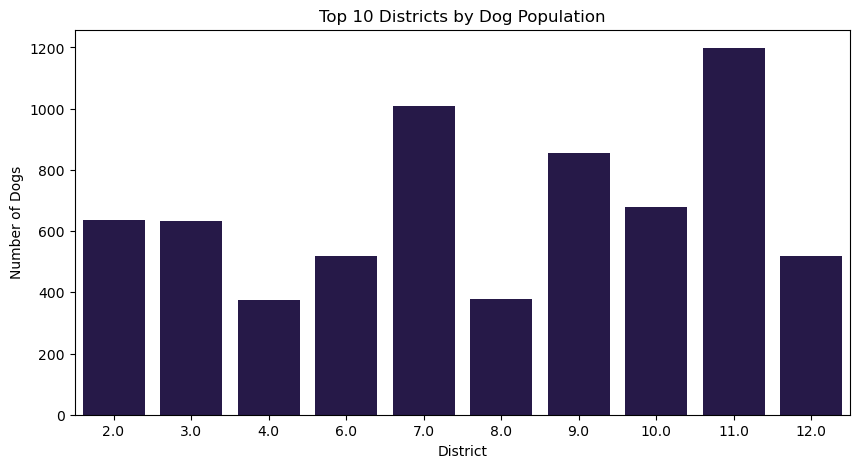

In [63]:
#I want to see which districts have the most dogs.

top_districts = df["stadtkreis"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(
    x=top_districts.index,
    y=top_districts.values,
    color=sns.color_palette("magma")[0]
)
plt.xlabel("District")
plt.ylabel("Number of Dogs")
plt.title("Top 10 Districts by Dog Population")
plt.show()

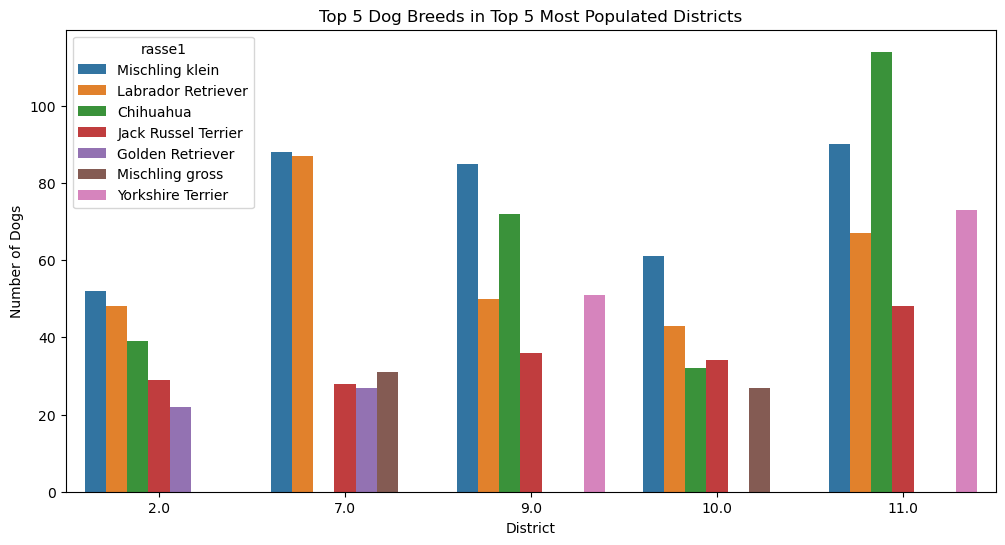

In [41]:
#Looking only at the top 5 most populated districts, I want to see the breakdown of top 5 most common breeds in each district.

top_districts = df["stadtkreis"].value_counts().head(5).index
filtered_df = df[df["stadtkreis"].isin(top_districts)]

top_breeds_per_district = (
    filtered_df.groupby("stadtkreis")["rasse1"]
    .value_counts()
    .groupby(level=0)
    .head(5)
    .reset_index(name="count")
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_breeds_per_district,
    x="stadtkreis",
    y="count",
    hue="rasse1",
    palette="tab10"
)
plt.xlabel("District")
plt.ylabel("Number of Dogs")
plt.title("Top 5 Dog Breeds in Top 5 Most Populated Districts")
plt.show()

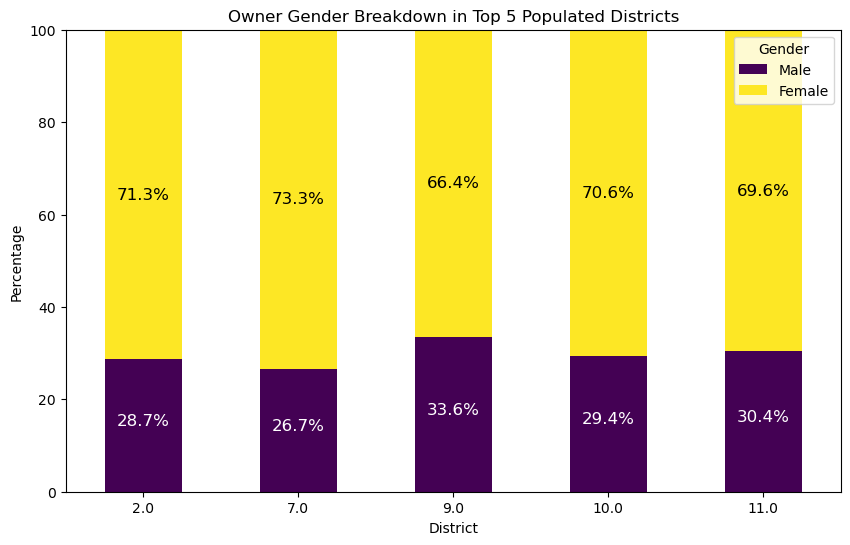

In [53]:
#Looking only at the top 5 most populated districts, I want to see the gender breakdown of owners.

import numpy as np

gender_counts = filtered_df.groupby(["stadtkreis", "geschlecht"]).size().unstack()
gender_perc = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(10,6))
gender_perc.plot(kind="bar", stacked=True, ax=ax, colormap="viridis")

for i, (male, female) in enumerate(zip(gender_perc["m"], gender_perc["w"])):
    ax.text(i, male / 2, f"{male:.1f}%", ha="center", color="white", fontsize=12)
    ax.text(i, male + (female / 2), f"{female:.1f}%", ha="center", va="center", color="black", fontsize=12)

plt.xlabel("District")
plt.ylabel("Percentage")
plt.title("Owner Gender Breakdown in Top 5 Populated Districts")
plt.legend(title="Gender", labels=["Male", "Female"], loc="upper right")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

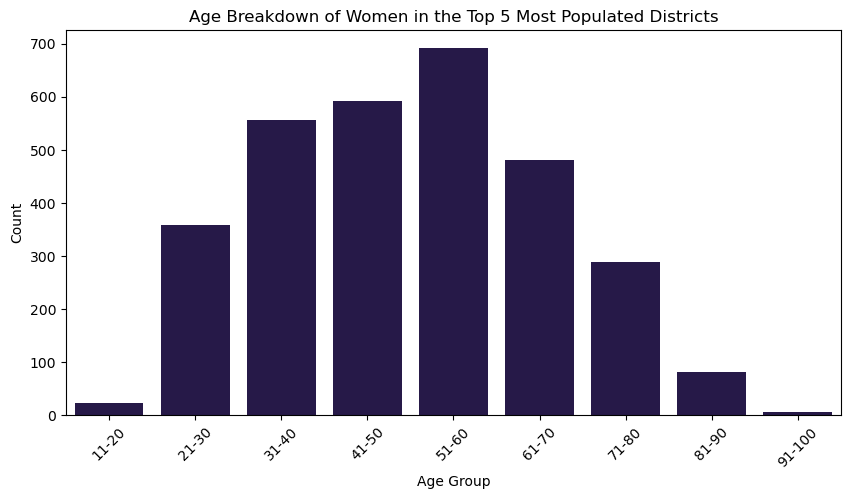

In [61]:
#I'll now take it a step deeper to see the breakdown of age ranges for the women in the top 5 most populated districts.

women_df = df[(df["stadtkreis"].isin(top_districts)) & (df["geschlecht"] == "w")]
age_counts = women_df["alter"].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=age_counts.index,
            y=age_counts.values,
            color=sns.color_palette("magma")[0])

plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Age Breakdown of Women in the Top 5 Most Populated Districts")
plt.xticks(rotation=45)
plt.show()

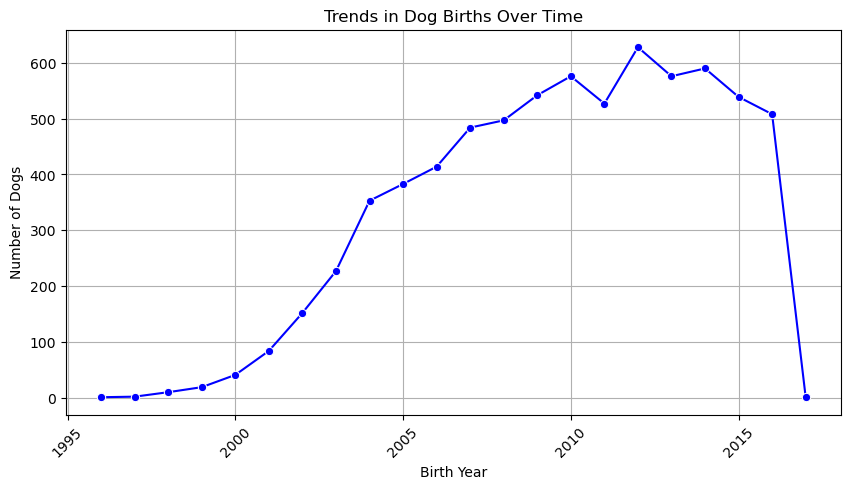

In [67]:
#I'll now take a look to see if there's been any major shift in dog breed popularity in recent years to be sure I'm on the right track if I consider that an important variable.

birth_year_counts = df["geburtsjahr_hund"].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=birth_year_counts.index, y=birth_year_counts.values, marker="o", color="blue")
plt.xlabel("Birth Year")
plt.ylabel("Number of Dogs")
plt.title("Trends in Dog Births Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

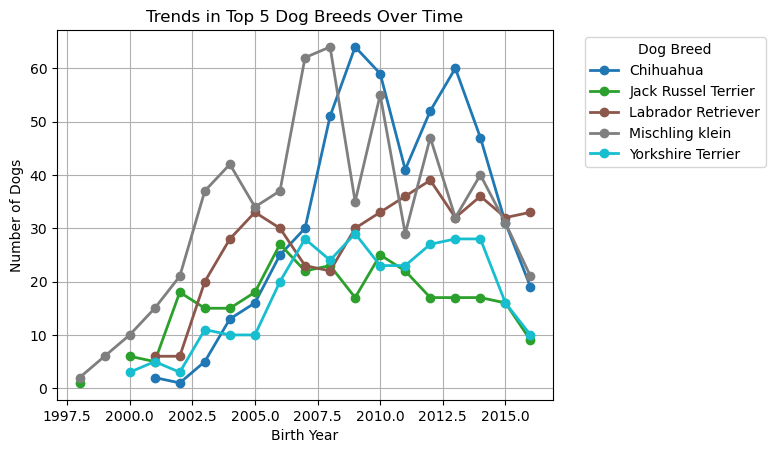

In [69]:
top_5_breeds = df['rasse1'].value_counts().head(5).index
filtered_df = df[df["rasse1"].isin(top_5_breeds)]
breed_trends = filtered_df.groupby(["geburtsjahr_hund", "rasse1"]).size().unstack()

plt.figure(figsize=(12,6))
breed_trends.plot(kind="line", marker="o", colormap="tab10", linewidth=2)

plt.xlabel("Birth Year")
plt.ylabel("Number of Dogs")
plt.title("Trends in Top 5 Dog Breeds Over Time")
plt.legend(title="Dog Breed", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

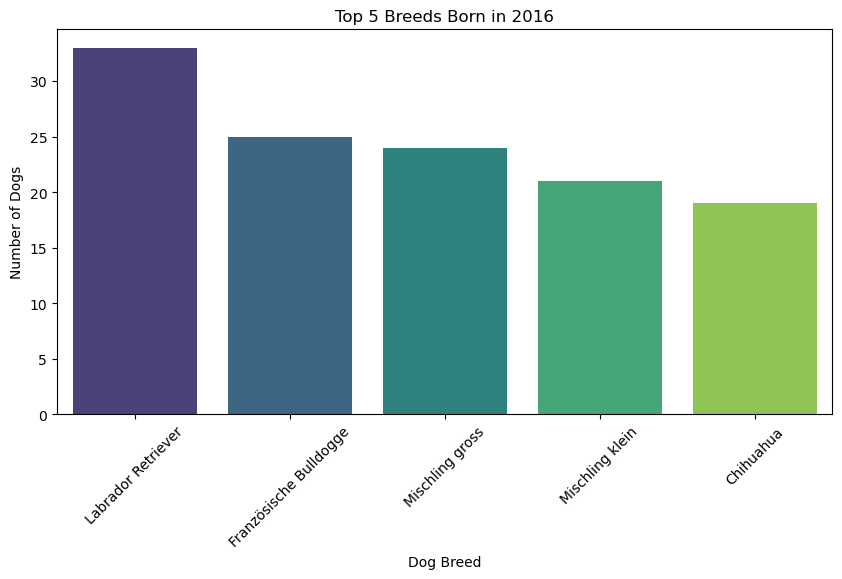

In [75]:
#Now I'm going to do a quick check to see if there were any top dog breeds in 2016 that had been missed when I was looking at all years as a whole.

dogs_2016 = df[df["geburtsjahr_hund"] == 2016]
top_5_breeds_2016 = dogs_2016["rasse1"].value_counts().head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=top_5_breeds_2016.index, y=top_5_breeds_2016.values, hue=top_5_breeds_2016.index, legend=False, palette="viridis")

plt.xlabel("Dog Breed")
plt.ylabel("Number of Dogs")
plt.title("Top 5 Breeds Born in 2016")
plt.xticks(rotation=45)
plt.show()

Chi-Square Statistic: 44.302022, P-value: 0.0000


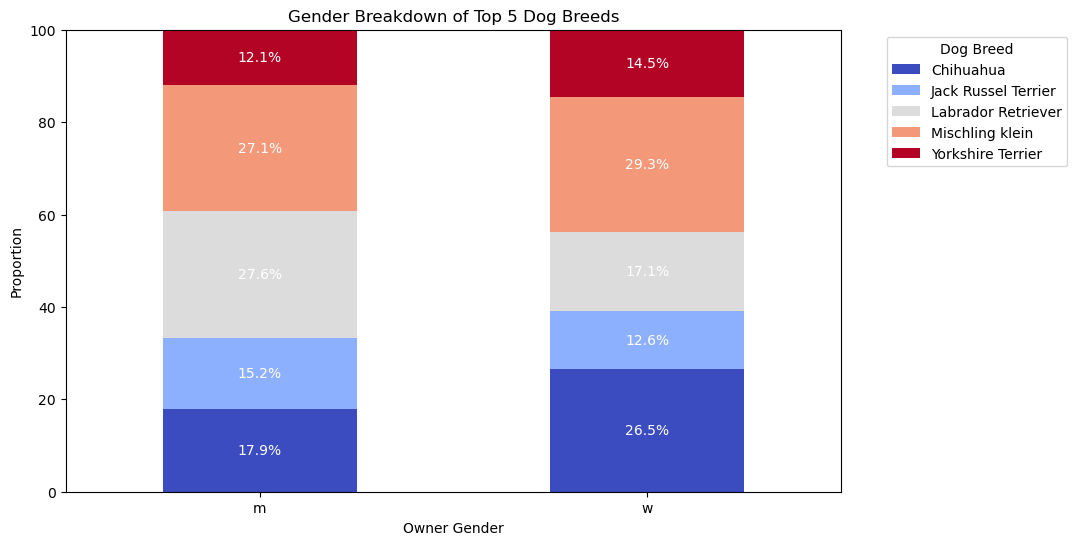

In [87]:
#Now I'll take a look at the breakdown of dog breed among male vs female owners.

from scipy.stats import chi2_contingency

top_5_breeds = df["rasse1"].value_counts().head(5).index
filtered_df = df[df["rasse1"].isin(top_5_breeds)]

contingency_table = pd.crosstab(filtered_df["geschlecht"], filtered_df["rasse1"])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2:2f}, P-value: {p:.4f}")

contingency_perc = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100 
fig, ax = plt.subplots(figsize=(10, 6))
contingency_perc.plot(kind="bar", stacked=True, figsize=(10,6), colormap="coolwarm", ax=ax)

for i, bars in enumerate(ax.containers):
    for bar in bars:
        height = bar.get_height()
        if height > 5:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2,
                f"{height:.1f}%", ha="center", va="center", fontsize=10, color="white")

plt.xlabel("Owner Gender")
plt.ylabel("Proportion")
plt.title("Gender Breakdown of Top 5 Dog Breeds")
plt.legend(title="Dog Breed", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

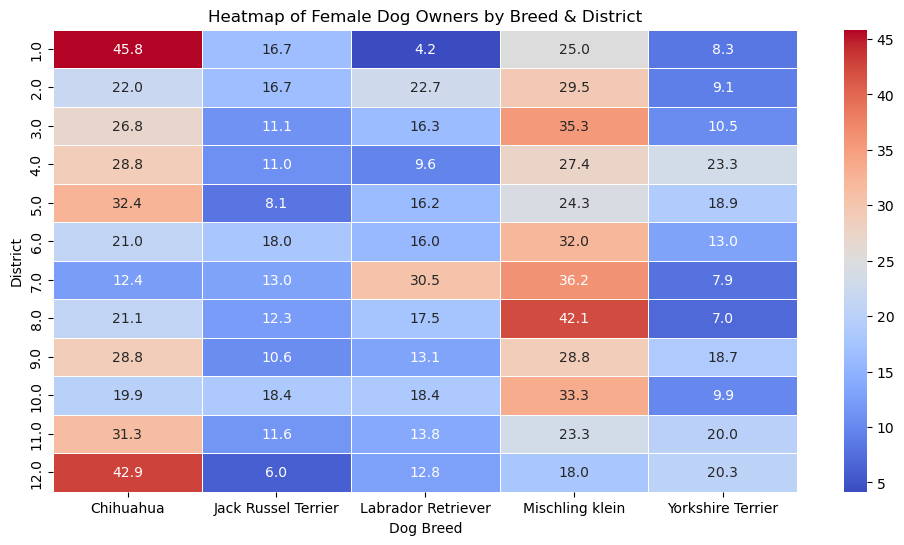

In [97]:
#Now I'll take a look at the heatmap of dogs that have a female owner in each district. This would be valuable for creating targeted marketing campiagns.

women_df = df[df["geschlecht"] == "w"]

top_5_breeds_women = women_df["rasse1"].value_counts().head(5).index
filtered_women_df = women_df[women_df["rasse1"].isin(top_5_breeds_women)]

district_breed_counts = filtered_women_df.groupby(["stadtkreis", "rasse1"]).size().unstack(fill_value=0)
district_breed_perc = district_breed_counts.div(district_breed_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12,6))
sns.heatmap(district_breed_perc, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)

plt.xlabel("Dog Breed")
plt.ylabel("District")
plt.title("Heatmap of Female Dog Owners by Breed & District")
plt.show()